### Installation de Selenium

In [ ]:
#!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
#!sudo apt-get update
#!sudo -E apt-get install -y /tmp/chrome.deb
#!pip install chromedriver-autoinstaller selenium

### Test de la fonction générale : 

In [1]:
from scrapping_ciqual import *

In [14]:
Pl_to_Sg('crème liquide')

'crème liquide'

In [2]:
recipe_test = {'chocolat noir': '200g',
  'maïzena': '2c.à.s rase',
  'oeufs': '4',
  'crème liquide': '20cl'}

In [3]:
get_nutrition_recipe(recipe_test)

['chocolat noir', 'maïzena', 'oeufs', 'crème liquide']


  0%|          | 0/4 [00:00<?, ?it/s]

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: headless chrome=108.0.5359.94)
Stacktrace:
#0 0x562a35ea1563 <unknown>
#1 0x562a35c60667 <unknown>
#2 0x562a35c640b8 <unknown>
#3 0x562a35c63e82 <unknown>
#4 0x562a35c6418c <unknown>
#5 0x562a35c9705e <unknown>
#6 0x562a35cbd122 <unknown>
#7 0x562a35c91c0f <unknown>
#8 0x562a35cbd2ee <unknown>
#9 0x562a35cd4a7c <unknown>
#10 0x562a35cbcef3 <unknown>
#11 0x562a35c9049e <unknown>
#12 0x562a35c915ae <unknown>
#13 0x562a35ef0fde <unknown>
#14 0x562a35ef44c4 <unknown>
#15 0x562a35ed778e <unknown>
#16 0x562a35ef5393 <unknown>
#17 0x562a35eca665 <unknown>
#18 0x562a35f16108 <unknown>
#19 0x562a35f16296 <unknown>
#20 0x562a35f31183 <unknown>
#21 0x7fb5d110d609 start_thread


## Brouillon de la fonction générale 

In [1]:
import chromedriver_autoinstaller

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By


In [3]:
chromedriver_autoinstaller.install() 
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')

driver = webdriver.Chrome("chromedriver", options=chrome_options)

In [4]:
driver.get('https://ciqual.anses.fr/')

In [5]:
switch_to_french = driver.find_element(By.XPATH, "//a[@id='fr-switch']")
driver.execute_script("arguments[0].click();", switch_to_french)

In [10]:
research_bar = driver.find_element("xpath", "//input[@id='champ-recherche']")
research_bar.send_keys("crème liquide")

search_button = driver.find_element("xpath", "//a[@id='loupe']")
search_button.click()

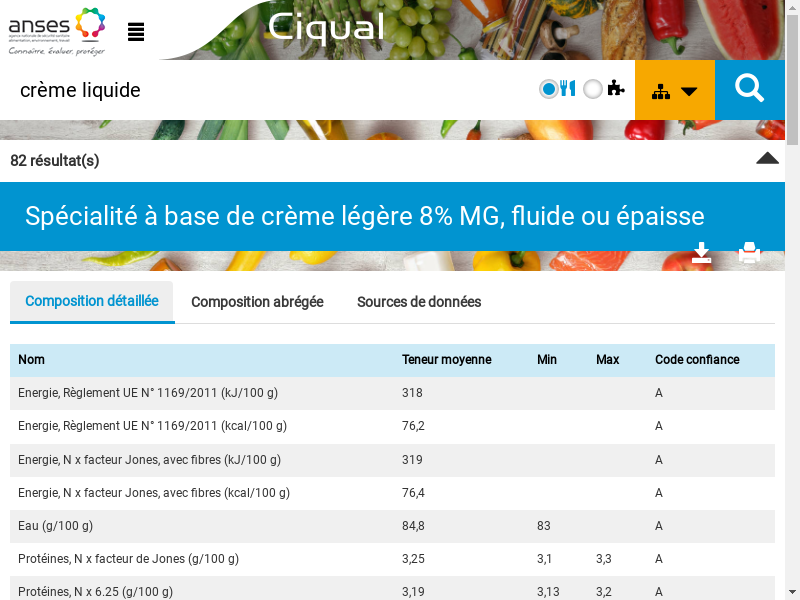

In [7]:
from IPython.display import Image
png = driver.get_screenshot_as_png()
Image(png, width='500')

In [8]:
research_bar.clear()

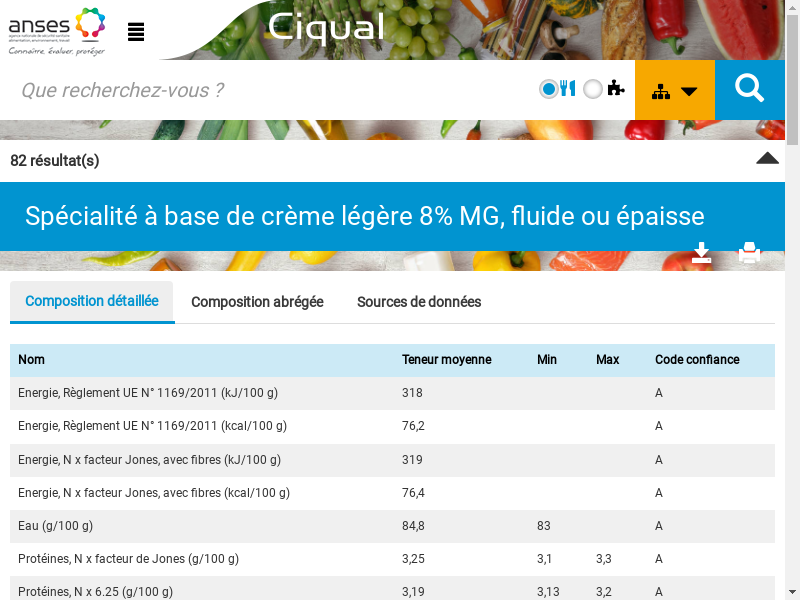

In [9]:
png = driver.get_screenshot_as_png()
Image(png, width='500')

In [25]:
research_bar.send_keys("crème")

search_button = driver.find_element("xpath", "//a[@id='loupe']")
search_button.click()

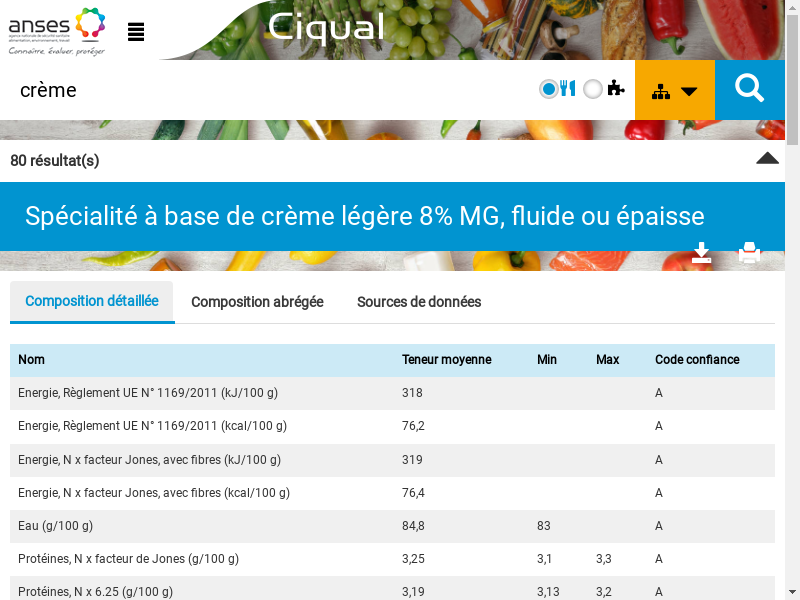

In [26]:
png = driver.get_screenshot_as_png()
Image(png, width='500')

In [11]:
search = driver.find_elements("xpath", "//td")

liste = [] 
n = 0 
for result in search :
    texte = result.text
    if n%5 == 0 and texte != "":  
        liste.append(texte)
    if n%5 == 1 and texte != "" : 
        if "<" in texte : 
            texte = "0"
        liste.append(float(texte.replace(',','.')))
    n += 1 

liste

['Energie, Règlement UE N° 1169/2011 (kJ/100 g)',
 318.0,
 'Energie, Règlement UE N° 1169/2011 (kcal/100 g)',
 76.2,
 'Energie, N x facteur Jones, avec fibres (kJ/100 g)',
 319.0,
 'Energie, N x facteur Jones, avec fibres (kcal/100 g)',
 76.4,
 'Eau (g/100 g)',
 84.8,
 'Protéines, N x facteur de Jones (g/100 g)',
 3.25,
 'Protéines, N x 6.25 (g/100 g)',
 3.19,
 'Glucides (g/100 g)',
 5.28,
 'Lipides (g/100 g)',
 4.3,
 'Sucres (g/100 g)',
 4.44,
 'Fructose (g/100 g)',
 0.0,
 'Galactose (g/100 g)',
 0.0,
 'Glucose (g/100 g)',
 0.0,
 'Lactose (g/100 g)',
 4.25,
 'Maltose (g/100 g)',
 0.0,
 'Saccharose (g/100 g)',
 0.19,
 'Fibres alimentaires (g/100 g)',
 0.0,
 'Polyols totaux (g/100 g)',
 0.0,
 'Cendres (g/100 g)',
 0.71,
 'Alcool (g/100 g)',
 0.0,
 'Acides organiques (g/100 g)',
 0.21,
 'AG saturés (g/100 g)',
 2.88,
 'AG monoinsaturés (g/100 g)',
 1.01,
 'AG polyinsaturés (g/100 g)',
 0.07,
 'AG 4:0, butyrique (g/100 g)',
 0.16,
 'AG 6:0, caproïque (g/100 g)',
 0.11,
 'AG 8:0, capryliqu